# MVC: Máquina Vector Soporte

In [1]:
# Importar la biblioteca Pandas y renombrarla como "pd"
import pandas as pd

# Importar la biblioteca NumPy para operaciones numéricas
import numpy as np

# Importar la función train_test_split de scikit-learn para dividir conjuntos de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Importar la clase SVC (Support Vector Classifier) de scikit-learn para implementar máquinas de soporte vectorial
from sklearn.svm import SVC

# Importar la biblioteca Matplotlib para visualización de datos y configurar la visualización en línea en Jupyter Notebooks
from matplotlib import pyplot as plt

# Importar la clase LabelEncoder desde scikit-learn para la codificación de etiquetas
from sklearn.preprocessing import LabelEncoder

# Importar la función confusion_matrix de scikit-learn para evaluar el rendimiento del modelo
from sklearn.metrics import confusion_matrix

# Importar seaborn para visualización de datos
import seaborn as sns

# Importar la función accuracy_score de scikit-learn para evaluar la precisión del modelo
from sklearn.metrics import accuracy_score

# Importar la función de pérdida Hinge desde scikit-learn
from sklearn.metrics import hinge_loss


## 2. Análisis de Datos

In [2]:
#Iportamos el CSV 
url = 'Cancer_Data.csv'


# Importar la biblioteca Pandas y leer un conjunto de datos desde una URL
df = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame para obtener una vista previa de los datos
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Comprobar si existen valores nulos o faltan
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## 3. Preprocesado y Limpieza de Datos

<h3 style="color:purple">Tratamiento de las variables categóricas</h3>

<h3 style="color:green">Convertir las variables categóricas a numéricas</h3>

la clase LabelEncoder de la biblioteca scikit-learn (sklearn) permite codificar las etiquetas de las características de un DataFrame.
El método *fit_transform()* transforma las etiquetas de las características en números enteros, asignando un número  arbitrario único a cada etiqueta.

En nuestro caso tenemos que convertir la columna *diagnosis* que tiene como valores *M (Maligno)* y B (Benigno) que se transformaran en 1 y 0 respectivamente

In [4]:
# Crear una instancia de la clase LabelEncoder
label_encoder = LabelEncoder()

# Aplicar la transformación a la columna 'diagnosis' del DataFrame df y reemplazar los valores originales con los transformados
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Eliminar las columnas 'id' y 'Unnamed: 32' del DataFrame df
df = df.drop(['id', 'Unnamed: 32'], axis='columns')

# Mostrar las primeras filas del DataFrame df después de las transformaciones
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 4. División del dataset

In [5]:
# Crear un nuevo DataFrame df1 que contiene solo las filas donde la columna 'diagnosis' es igual a 0
df1 = df[df.diagnosis == 0]

# Crear un nuevo DataFrame df2 que contiene solo las filas donde la columna 'diagnosis' es igual a 1
df2 = df[df.diagnosis == 1]


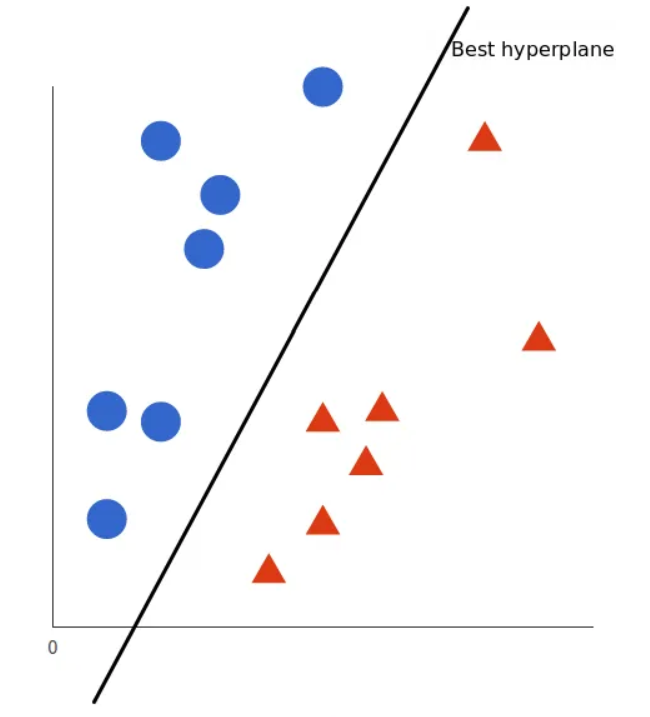

el hiperplano es la distancia al elemento más cercano de cada etiqueta es la más grande.

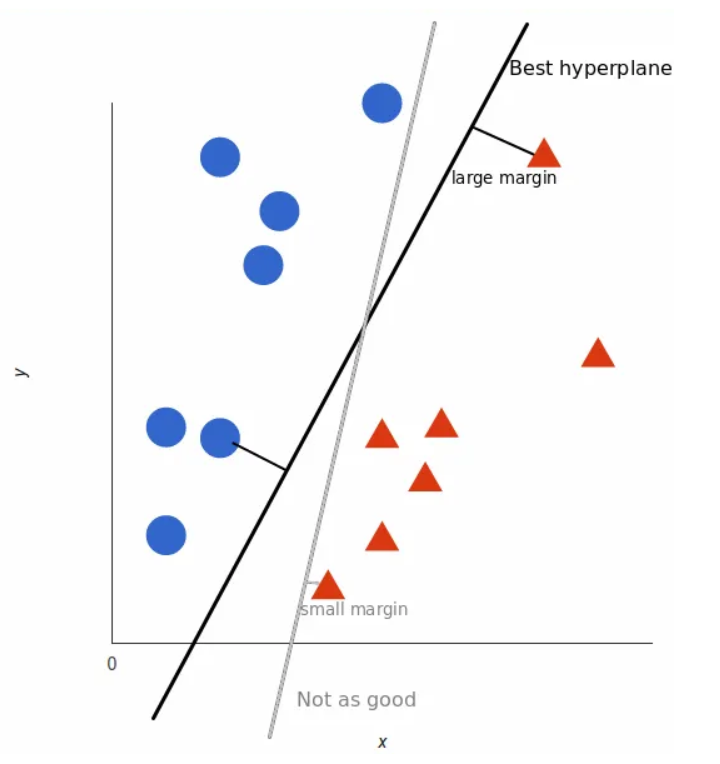

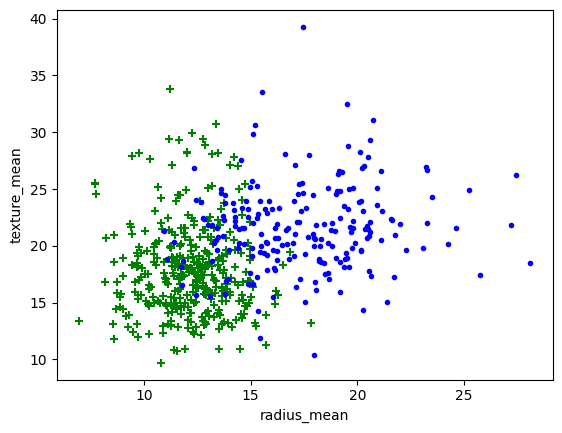

In [6]:
# Establecer la etiqueta del eje x
plt.xlabel('radius_mean')

# Establecer la etiqueta del eje y
plt.ylabel('texture_mean')

# Crear un gráfico de dispersión para df1 con 'radius_mean' en el eje x y 'texture_mean' en el eje y, marcando los puntos con un signo de más (marker='+') y color verde
plt.scatter(df1['radius_mean'], df1['texture_mean'], color='green', marker='+')

# Crear un gráfico de dispersión para df2 con 'radius_mean' en el eje x y 'texture_mean' en el eje y, marcando los puntos con un punto (marker='.') y color azul
plt.scatter(df2['radius_mean'], df2['texture_mean'], color='blue', marker='.')


A continuacion vamos a entrenar un modelo de prueba que solo contiene las columnas "radius_mean" y "texture_mean" para ver como se genera el hiperplano y se pueda visualizar en una prueba real

c:\Users\Pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


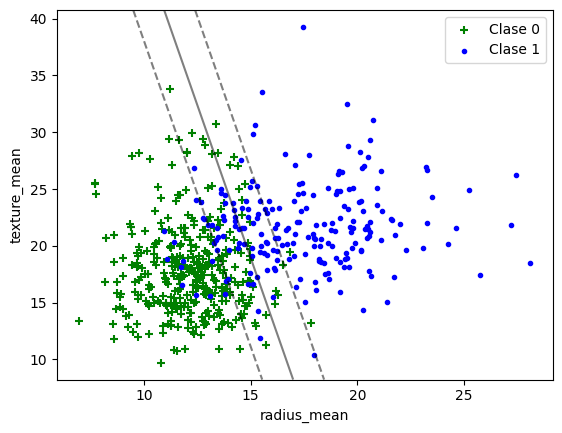

In [7]:
# Crear un nuevo DataFrame df1 que contiene solo las filas donde la columna 'radius_mean', 'texture_mean'
df1_prueba = df[df.diagnosis == 0]
df1_prueba = df1_prueba[['radius_mean', 'texture_mean']]

# Crear un nuevo DataFrame df2 que contiene solo las filas donde la columna 'radius_mean', 'texture_mean'
df2_prueba = df[df.diagnosis == 1]
df2_prueba = df2_prueba[['radius_mean', 'texture_mean']]

# Combinar ambos conjuntos de datos y asignar etiquetas
X_prueba = pd.concat([df1_prueba, df2_prueba], axis=0)
y_prueba = pd.concat([pd.Series([0] * len(df1_prueba)), pd.Series([1] * len(df2_prueba))], axis=0)

# Utilizar la función train_test_split para dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train_prueba, X_test_prueba, y_train_prueba, y_test_prueba = train_test_split(X_prueba, y_prueba, test_size=0.2)

# Crear un modelo de Máquinas de Soporte Vectorial (SVM) con un kernel lineal
modelo_prueba = SVC(kernel='linear')

# Entrenar el modelo utilizando los conjuntos de entrenamiento
modelo_prueba.fit(X_train_prueba, y_train_prueba)

# Establecer la etiqueta del eje x
plt.xlabel('radius_mean')

# Establecer la etiqueta del eje y
plt.ylabel('texture_mean')

# Crear un gráfico de dispersión para df1 con 'radius_mean' en el eje x y 'texture_mean' en el eje y, marcando los puntos con un signo de más (marker='+') y color verde
plt.scatter(df1_prueba['radius_mean'], df1_prueba['texture_mean'], color='green', marker='+', label='Clase 0')

# Crear un gráfico de dispersión para df2 con 'radius_mean' en el eje x y 'texture_mean' en el eje y, marcando los puntos con un punto (marker='.') y color azul
plt.scatter(df2_prueba['radius_mean'], df2_prueba['texture_mean'], color='blue', marker='.', label='Clase 1')

# Obtener los límites del gráfico
xlim = plt.xlim()
ylim = plt.ylim()

# Crear una malla para evaluar el modelo con nombres de características
# Utiliza la función meshgrid de NumPy para crear una malla de puntos en el espacio de características definido por los límites del gráfico (xlim, ylim).
# La malla se compone de 100x100 puntos para una representación suave del hiperplano y los márgenes de decisión.
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Obtener los límites del gráfico
# Guarda los límites actuales del gráfico en las variables xlim y ylim.
# Estos límites se utilizan posteriormente para crear una malla uniforme y evaluar el modelo.
xlim = plt.xlim()
ylim = plt.ylim()

# Crear una malla para evaluar el modelo con nombres de características
# Utiliza la función meshgrid de NumPy para crear una malla de puntos en el espacio de características definido por los límites del gráfico (xlim, ylim).
# La malla se compone de 100x100 puntos para una representación suave del hiperplano y los márgenes de decisión.
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Obtener la salida de decision_function en la malla
# Utiliza el modelo de Máquinas de Soporte Vectorial (SVM) entrenado (modelo_prueba) para obtener las distancias firmadas desde la malla hasta el hiperplano de decisión.
# La malla se define por la concatenación de los valores xx y yy utilizando la función ravel de NumPy.
Z = modelo_prueba.decision_function(grid)

# Reshape la salida del modelo en la malla
# Reorganiza la salida del modelo para que coincida con las dimensiones originales de la malla.
# Esto es necesario para que la salida de decision_function pueda ser utilizada correctamente en la función de contorno (contour).
Z = Z.reshape(xx.shape)

# Dibujar el hiperplano y los márgenes de decisión
# Utiliza la función de contorno (contour) de Matplotlib para visualizar las líneas de nivel que representan el hiperplano y los márgenes de decisión.
# Se utilizan niveles específicos (-1, 0, 1) para indicar el margen y el hiperplano.
# Se especifica el color ('k' para negro) y los estilos de línea ('--', '-', '--') para mejorar la visualización.
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [8]:
# Crear un nuevo DataFrame X que contiene las características (sin la columna 'diagnosis') del DataFrame df
X = df.drop(['diagnosis'], axis='columns')

# Mostrar las primeras filas del DataFrame X
X.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Asigna la columna 'diagnosis' del DataFrame df a la variable y.
y = df.diagnosis

Dividimos el dataset en 4 grupos: 2 para entrenamiento y 2 para pruebas

In [10]:
# Utilizar la función train_test_split para dividir el conjunto de datos en conjuntos de entrenamiento y prueba
# X contiene las características, y contiene las etiquetas
# El parámetro test_size especifica la proporción del conjunto de prueba (en este caso, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [11]:
#Imprimimos longitud de los datos de entrenamiento y prueba
print(len(X_train))
print(len(X_test))

455
114


## 5. Creación del modelo

In [12]:
# Crear un modelo de Máquinas de Soporte Vectorial (SVM) con un kernel lineal
model = SVC(kernel='linear')

## 6. Entrenamiento

In [13]:
# Entrenar el modelo utilizando los conjuntos de entrenamiento
model.fit(X_train, y_train)

SVC(kernel='linear')

## 7. Predicciones

In [14]:
# Realizar predicciones en el conjunto de prueba utilizando el modelo entrenado
predictions = model.predict(X_test)

# Imprimir las predicciones
print(predictions)

[0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0
 1 0 0]


In [15]:
# Calcular la precisión del modelo en el conjunto de prueba
percentage = model.score(X_test, y_test)

## 8. Cálculo de errores

Definamos nuestra función de perdida (qué minimizar)
Usaremos Hinge Loss. La pérdida de Hinge (Hinge Loss) es una función de pérdida utilizada comúnmente en problemas de clasificación binaria, especialmente en el contexto de Máquinas de Soporte Vectorial (SVM) y clasificación de "márgen máximo"
El concepto de "margen máximo" en SVM se refiere al espacio entre el hiperplano de decisión y las muestras más cercanas de ambas clases.

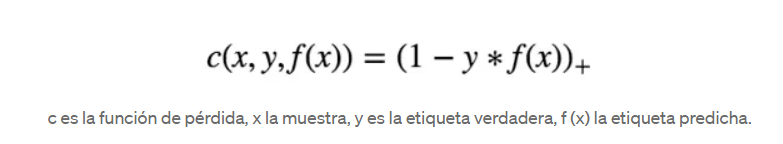

In [16]:
# Obtener las puntuaciones del modelo en el conjunto de prueba
model_scores_test = model.decision_function(X_test)

# Calcular la pérdida Hinge en el conjunto de prueba
loss_test = hinge_loss(y_test, model_scores_test)

# Mostrar la pérdida Hinge en el conjunto de prueba
print("Pérdida Hinge en el conjunto de prueba:", loss_test)

# Normalizar la pérdida en porcentaje
total_samples = len(y_test)
loss_percentage = (loss_test / total_samples) * 100

# Mostrar la pérdida Hinge en el conjunto de prueba como porcentaje
print(f"Pérdida Hinge en el conjunto de prueba como porcentaje: {loss_percentage:.2f}%")

Pérdida Hinge en el conjunto de prueba: 0.07819723418787189
Pérdida Hinge en el conjunto de prueba como porcentaje: 0.07%


## 9. Gráfica Matriz de Confusión

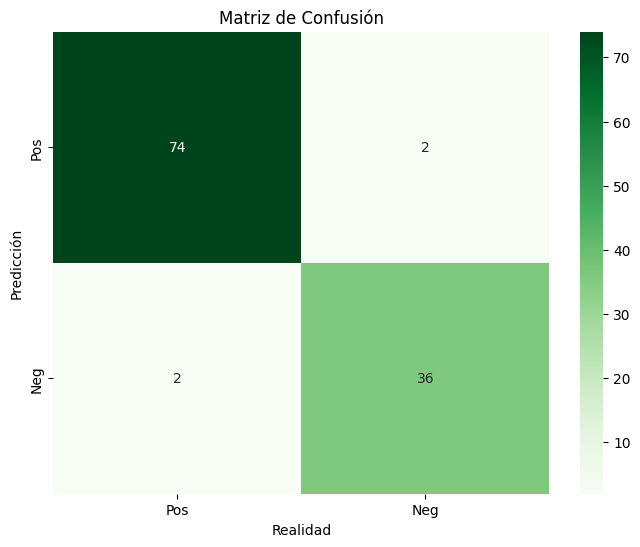

Precisión = 96.49 %


In [18]:
# Calcular la matriz de confusión
res = confusion_matrix(y_test, predictions)

# Definir etiquetas para los ejes x e y en la visualización de la matriz de confusión
xticklabels = ['Pos', 'Neg']
yticklabels = ['Pos', 'Neg']

# Crear el gráfico de la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(res, annot=True, fmt='d', cmap='Greens',
            xticklabels=xticklabels, yticklabels=yticklabels)

# Configurar etiquetas y título del gráfico
plt.xlabel('Realidad')
plt.ylabel('Predicción')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

# Calcular y mostrar la precisión del modelo
precision = accuracy_score(y_test, predictions)
print(f"Precisión = {precision*100:.2f} %")
